In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import sys
import import_ipynb
import cardChoice
import traceback
from datetime import datetime


import matplotlib.pyplot as plt
#traceback.print_stack()


In [11]:
def log_traceback(ex, sim):
    tb_lines = traceback.format_exception(ex.__class__, ex, ex.__traceback__)
    tb_text = ''.join(tb_lines)
    # I'll let you implement the ExceptionLogger class,
    # and the timestamping.
    print(tb_text)
    print("info: ")
    print("\t",sim.p1.turn)
    print("\t",sim.shop.cards)
    print("\t",sim.shop.checkEnd())
    print("\tp1")
    print("\t",sim.p1.hand)
    print("\t",sim.p1.deck)
    print("\t",sim.p1.discard)
    print("\tp2")
    print("\t",sim.p2.hand)
    print("\t",sim.p2.deck)
    print("\t",sim.p2.discard)



In [12]:
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_shape=(18,)))
model.add(Dense(100, activation='linear'))
model.add(Dense(64, activation='linear'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [13]:
y = 0.95
eps = 0.5
decay_factor = 0.999
game_lengths = []
card_counts = []
num_episodes = 10000
start = datetime.now()
for i in range(num_episodes):
    sim = cardChoice.Simulation()
    eps *= decay_factor
    if (i+1) % 1000 == 0:
        print("Episode {} of {}".format(i + 1, num_episodes))
    done = False
    turns = 0
    while not done:
        if sim.p1.turn == sim.p2.turn:
            player = sim.p1
        else: 
            player = sim.p2
        current_state = np.array(sim.getBuyState(player))
        if np.random.random() < eps:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(model.predict(current_state))
        try:
            new_state, reward, done = sim.makeDecision(player, action)
            new_state = np.array(new_state)
        except Exception as ex:
            log_traceback(ex, sim)
            sys.exit()
        target = reward + y * np.max(model.predict(new_state))
        target_vec = model.predict(current_state)[0]
        target_vec[action] = target
        model.fit(current_state, target_vec.reshape(-1, 4), epochs=1, verbose=0)
    game_lengths.append(sim.p1.turn)
    card_counts.append(sum(sim.shop.cards.values()))

finish = datetime.now()
print("Time =", str(finish-start))

x=range(1,1+num_episodes)
y=game_lengths



Episode 1000 of 10000
Episode 2000 of 10000
Episode 3000 of 10000
Episode 4000 of 10000
Episode 5000 of 10000
Episode 6000 of 10000
Episode 7000 of 10000
Episode 8000 of 10000
Episode 9000 of 10000
Episode 10000 of 10000
Time = 1:15:19.314845


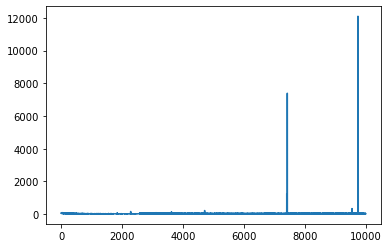

In [14]:
# Area plot
x=range(1,1+num_episodes)
y=game_lengths
plt.plot(x, y)


12095


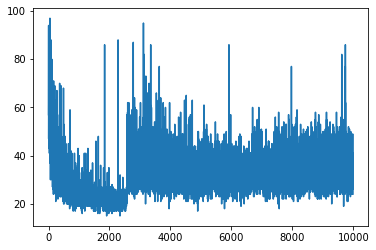

In [37]:
print(max(game_lengths))
new = list(filter(lambda length: length<100, game_lengths))
plt.plot(range(1,len(new)+1), new)

In [15]:
import statistics as math
def subgraph(interval, num_episodes, y):
    avgs = []
    for i in range(int(num_episodes/interval)):
        avgs.append(math.mean(y[i*interval:(i+1)*interval]))
    plt.plot(range(1,1+len(avgs)), avgs)

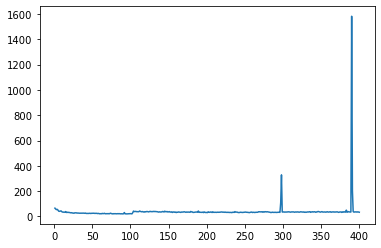

In [16]:
subgraph(25, num_episodes, game_lengths)

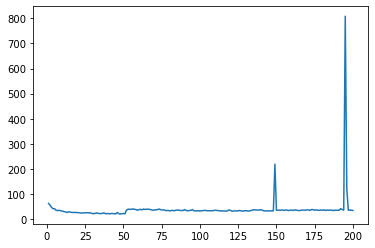

In [17]:
subgraph(50, num_episodes, game_lengths)

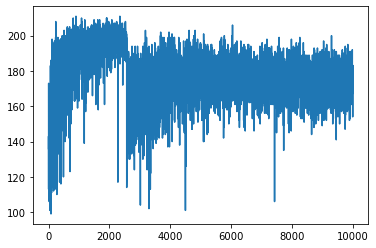

In [18]:
plt.plot(x, card_counts)

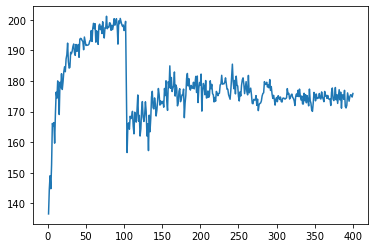

In [19]:
subgraph(25, num_episodes, card_counts)

In [20]:
model.save("dense_10000")

In [11]:
from tensorflow import keras
loadedModel = keras.models.load_model('complex_1000')

In [12]:
print(loadedModel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 6,144
Trainable params: 6,144
Non-trainable params: 0
_________________________________________________________________
None
